In [20]:
#Get the data, read the modified csv version
import pandas as pd
import numpy as np
dataset = pd.read_csv(r'csv/merge_modified_data.csv')
#dataset.loc[:, 'gender'] = 1
dataset.loc[dataset['gender'] == 'Male', 'gender'] = 1
dataset.loc[dataset['gender'] == 'Female', 'gender'] = 0
dataset.head(3)
dataset.tail(3)

,height(cm),weight(kg),gender,size
6065,170.18,84.368181,1,XXL
6066,175.26,74.842741,1,M
6067,185.42,98.883137,1,XL


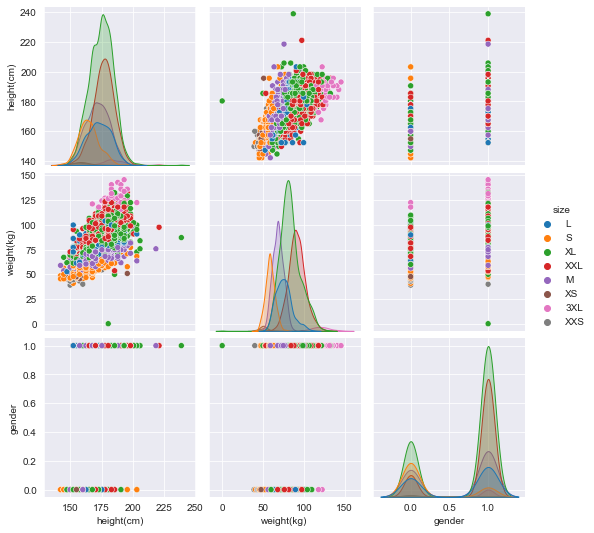

In [21]:
import seaborn as sns
%matplotlib inline

sns.pairplot(dataset, hue='size')

In [22]:
from sklearn.model_selection import train_test_split
X = dataset.drop('size', axis=1)
y = dataset['size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
decision_prediction = tree_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, decision_prediction))
print(classification_report(y_test, decision_prediction))

[[ 11   0   1   0  16   0   6   0]
 [  0  68  74  23 161   0  36   0]
 [  0 114 232  75  89   0   6   2]
 [  0  24  77 161  22   6   1   7]
 [  8 135  83  19 633   1 232   0]
 [  0   0   2  13   0   2   0   0]
 [  8  34   7   1 281   0 351   0]
 [  0   0   0   8   1   3   0   0]]
              precision    recall  f1-score   support

         3XL       0.41      0.32      0.36        34
           L       0.18      0.19      0.18       362
           M       0.49      0.45      0.47       518
           S       0.54      0.54      0.54       298
          XL       0.53      0.57      0.55      1111
          XS       0.17      0.12      0.14        17
         XXL       0.56      0.51      0.53       682
         XXS       0.00      0.00      0.00        12

    accuracy                           0.48      3034
   macro avg       0.36      0.34      0.35      3034
weighted avg       0.48      0.48      0.48      3034



In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=200)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
random_forest_predictions = random_forest_classifier.predict(X_test)
print(confusion_matrix(y_test, random_forest_predictions))
print(classification_report(y_test, random_forest_predictions))

[[ 15   0   1   0  14   0   4   0]
 [  0  40  72  29 180   0  41   0]
 [  0  72 242  75 119   0   9   1]
 [  0  20  78 171  19   6   1   3]
 [  8  70  76  27 663   0 267   0]
 [  0   0   1  14   0   2   0   0]
 [ 10  23   4   1 266   0 378   0]
 [  0   0   0   8   0   4   0   0]]
              precision    recall  f1-score   support

         3XL       0.45      0.44      0.45        34
           L       0.18      0.11      0.14       362
           M       0.51      0.47      0.49       518
           S       0.53      0.57      0.55       298
          XL       0.53      0.60      0.56      1111
          XS       0.17      0.12      0.14        17
         XXL       0.54      0.55      0.55       682
         XXS       0.00      0.00      0.00        12

    accuracy                           0.50      3034
   macro avg       0.36      0.36      0.36      3034
weighted avg       0.48      0.50      0.49      3034



In [29]:
person = [[152, 45, 1]]
random_forest_classifier.predict(person)

c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['S'], dtype=object)

In [30]:
person = [[175, 65, 0]]
random_forest_classifier.predict(person)

c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)